In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
_myDateFormat = '%Y-%m-%d'

In [3]:
df = pd.read_csv('data/input/historicEarningsAndPrices.csv')

In [4]:
data_types_dict = {'reportedEPS': float, 'estimatedEPS': float, 'surprise': float, 'surprisePercentage': float,\
                   'dayBeforeEndPrice': float, 'dayAfterEndPrice':float, 'dayBeforeVolume': int,\
                   'dayAfterVolume': int}

In [5]:
df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'], format=_myDateFormat)
df['reportedDate'] = pd.to_datetime(df['reportedDate'], format=_myDateFormat)

In [6]:
df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721


In [7]:
df.shape

(305195, 11)

In [8]:
filtered_df = df.loc[(df['reportedDate'] >= '2010-01-01')]
filtered_df = df.loc[(df['dayBeforeEndPrice'] >= 0.5)]
filtered_df = df.loc[(df['dayBeforeVolume'] >= 1000)]
filtered_df = df.loc[(df['dayAfterVolume'] >= 1000)]

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.shape

(199315, 11)

In [9]:
##Creating fake dates for CalMapping
releaseDates = {}
fiscalDates ={}
releaseWeeks = {}
temp_filtered_df = filtered_df.loc[:,:]
temp_filtered_df["tempFiscalDate"] = pd.NaT
temp_filtered_df["tempReleaseDate"] = pd.NaT
temp_filtered_df.head()
temp_filtered_df.reset_index(drop=True, inplace=True)

C:\Users\Sam\AppData\Local\Temp\ipykernel_23376\3273725270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_filtered_df["tempFiscalDate"] = pd.NaT
C:\Users\Sam\AppData\Local\Temp\ipykernel_23376\3273725270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_filtered_df["tempReleaseDate"] = pd.NaT


In [10]:
for index, row in temp_filtered_df.iterrows():
    dateFiscalStr = "2000-"+str(row['fiscalDateEnding'])[-14:-9]
    dateReleaseStr = "2000-"+str(row['reportedDate'])[-14:-9]
    if not dateFiscalStr in fiscalDates.keys():
        fiscalDates[dateFiscalStr] = 1
    else:
        fiscalDates[dateFiscalStr] +=1
        
    if not dateReleaseStr in releaseDates.keys():
        releaseDates[dateReleaseStr] = 1
    else:
        releaseDates[dateReleaseStr] +=1
    temp_filtered_df.iat[index, temp_filtered_df.columns.get_loc('tempFiscalDate')] = dateFiscalStr
    temp_filtered_df.iat[index, temp_filtered_df.columns.get_loc('tempReleaseDate')] = dateReleaseStr
        
temp_filtered_df['tempFiscalDate'] = pd.to_datetime(temp_filtered_df['tempFiscalDate'], format=_myDateFormat)
temp_filtered_df['tempReleaseDate'] = pd.to_datetime(temp_filtered_df['tempReleaseDate'], format=_myDateFormat)


C:\Users\Sam\AppData\Local\Temp\ipykernel_23376\1482864959.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_filtered_df['tempFiscalDate'] = pd.to_datetime(temp_filtered_df['tempFiscalDate'], format=_myDateFormat)
C:\Users\Sam\AppData\Local\Temp\ipykernel_23376\1482864959.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_filtered_df['tempReleaseDate'] = pd.to_datetime(temp_filtered_df['tempReleaseDate'], format=_myDateFormat)


In [11]:
temp_filtered_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume,tempFiscalDate,tempReleaseDate
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511,2000-01-31,2000-02-22
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565,2000-10-31,2000-11-22
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870,2000-07-31,2000-08-17
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659,2000-04-30,2000-05-25
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721,2000-01-31,2000-02-16


In [15]:
releaseDates

{'2000-02-22': 808,
 '2000-11-22': 132,
 '2000-08-17': 192,
 '2000-05-25': 143,
 '2000-02-16': 642,
 '2000-11-23': 132,
 '2000-08-18': 169,
 '2000-05-21': 186,
 '2000-02-18': 606,
 '2000-11-25': 94,
 '2000-08-14': 846,
 '2000-05-14': 738,
 '2000-02-20': 605,
 '2000-11-19': 222,
 '2000-02-14': 646,
 '2000-11-20': 174,
 '2000-08-15': 297,
 '2000-05-22': 143,
 '2000-11-15': 605,
 '2000-05-16': 286,
 '2000-11-16': 388,
 '2000-05-18': 220,
 '2000-02-17': 632,
 '2000-11-17': 211,
 '2000-02-13': 654,
 '2000-11-14': 896,
 '2000-02-15': 537,
 '2000-05-13': 727,
 '2000-11-12': 1132,
 '2000-08-16': 399,
 '2000-05-17': 331,
 '2000-02-12': 579,
 '2000-01-19': 235,
 '2000-10-14': 117,
 '2000-07-15': 151,
 '2000-04-15': 173,
 '2000-01-20': 250,
 '2000-04-22': 687,
 '2000-01-15': 81,
 '2000-10-16': 261,
 '2000-07-17': 245,
 '2000-04-17': 244,
 '2000-01-16': 103,
 '2000-10-17': 328,
 '2000-07-18': 368,
 '2000-04-18': 333,
 '2000-01-17': 142,
 '2000-10-18': 358,
 '2000-07-19': 410,
 '2000-04-24': 888,
 

In [16]:
fiscalDates

{'2000-01-31': 2316,
 '2000-10-31': 2144,
 '2000-07-31': 2168,
 '2000-04-30': 2148,
 '2000-12-31': 48230,
 '2000-09-30': 45191,
 '2000-06-30': 45486,
 '2000-03-31': 44775,
 '2000-11-30': 1664,
 '2000-08-31': 1703,
 '2000-05-31': 1709,
 '2000-02-28': 1350,
 '2000-02-29': 431}

<AxesSubplot:>

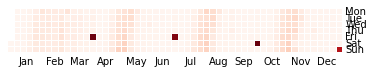

In [17]:
import calmap
releaseDatesSeries = pd.Series(releaseDates, name='DateValue')
releaseDatesSeries.index = pd.to_datetime(releaseDatesSeries.index, format = _myDateFormat)
calmap.yearplot(releaseDatesSeries, year=2000)

<AxesSubplot:>

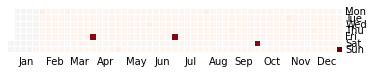

In [18]:
fiscalDatesSeries = pd.Series(fiscalDates, name='DateValue2')
fiscalDatesSeries.index = pd.to_datetime(fiscalDatesSeries.index, format = _myDateFormat)
calmap.yearplot(fiscalDatesSeries, year=2000)

In [ ]:
calmap.calendarplot()

In [ ]:
#  '2000-09-30': 10776,
#  '2000-06-30': 10220,
#  '2000-03-31': 10640,
#  '2000-12-31': 8832,